In [1]:
from symbulate import *
%matplotlib inline

# Linear process

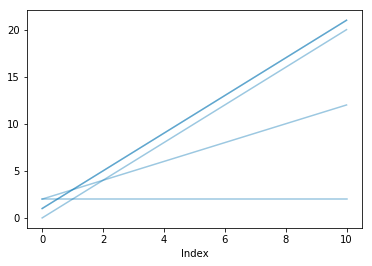

In [2]:
P = BoxModel([0, 1, 2], size=2)
A, B = RV(P)
t = ContinuousTimeFunction()
X = A + B * t
X.sim(5).plot()

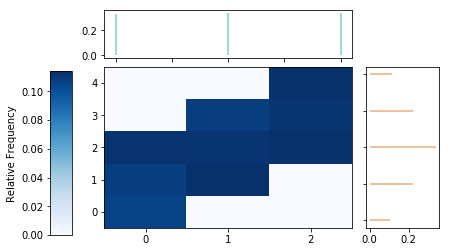

In [3]:
(X[0] & X[1]).sim(10000).plot(['tile', 'marginal'])

### As map from P to continuous time function

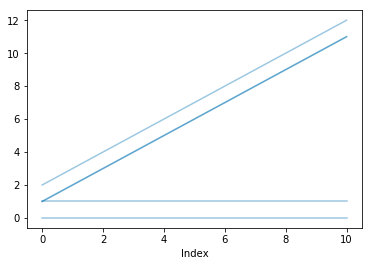

In [4]:
P = BoxModel([0, 1, 2], size=2)
t = ContinuousTimeFunction()
X = RV(P, lambda omega: omega[0] + omega[1] * t)
X.sim(5).plot()

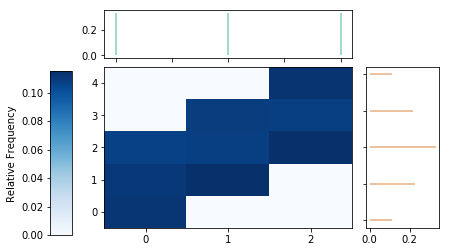

In [5]:
(X[0] & X[1]).sim(10000).plot(['tile', 'marginal'])

### As RandomProcess

In [1]:
P = BoxModel([0, 1, 2], size=2)

def f(omega, t):
    return omega[0] + omega[1] * t

X = RV(P, cumsum)
Y = RandomProcess(X)

X = RandomProcess(P, index_set=Reals(), func=f)
X.sim(10).plot()

NameError: name 'BoxModel' is not defined

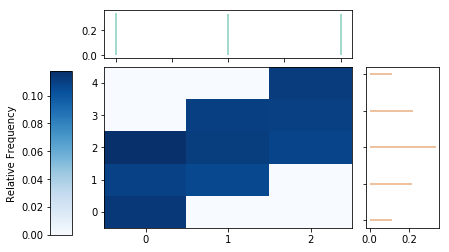

In [7]:
(X[0] & X[1]).sim(10000).plot(['tile', 'marginal'])

# Random signal

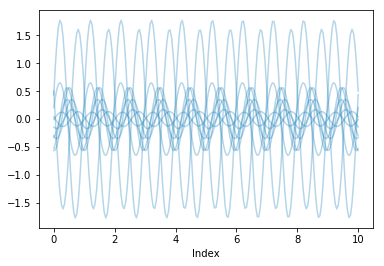

In [8]:
P = Exponential(1) * Uniform(-pi, pi)
t = ContinuousTimeFunction()
X = RV(P, lambda omega: omega[0] * cos(2 * pi * t + omega[1]))
X.sim(10).plot()

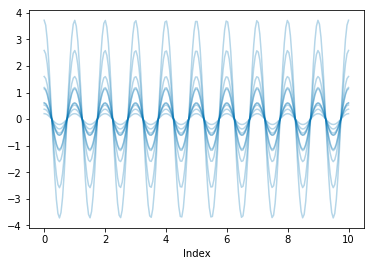

In [9]:
P = Exponential(1)
t = ContinuousTimeFunction()
Y = RV(P)
X = Y * cos(2 * pi * t)
X.sim(10).plot()

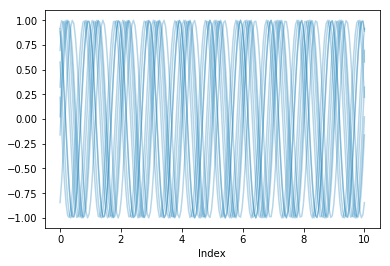

In [10]:
P = Uniform(-pi, pi)
t = ContinuousTimeFunction()
Z = RV(P)
X = cos(2 * pi * t + Z)
X.sim(10).plot()

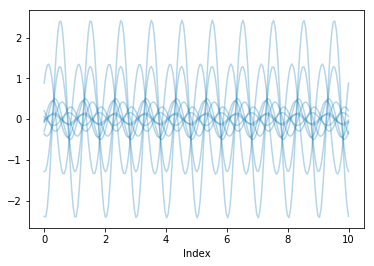

In [11]:
P = Exponential(1) * Uniform(-pi, pi)
t = ContinuousTimeFunction()
Y, Z = RV(P)
X = Y * cos(2 * pi * t + Z)
X.sim(10).plot()

# Random signal plus noise

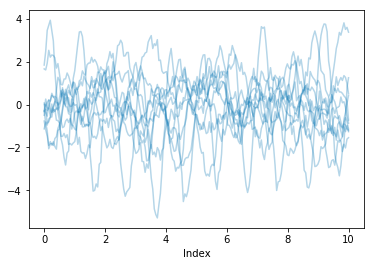

In [12]:
P = Exponential(1) * Uniform(-pi, pi) * GaussianProcessProbabilitySpace(lambda t: 0, lambda s, t: exp(-abs(t-s)))
t = ContinuousTimeFunction()
X = RV(P, lambda omega: omega[0] * cos(2 * pi * t + omega[1]) + omega[2])
X.sim(10).plot()

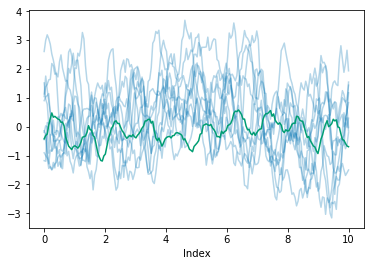

In [13]:
P = Exponential(1) * Uniform(-pi, pi) * GaussianProcessProbabilitySpace(lambda t: 0, lambda s, t: exp(-abs(t-s)))
t = ContinuousTimeFunction()
S = RV(P, lambda omega: omega[0] * cos(2 * pi * t + omega[1]))
N = RV(P)[2]
X = S + N
X.sim(10).plot()
X.sim(10).mean().plot()

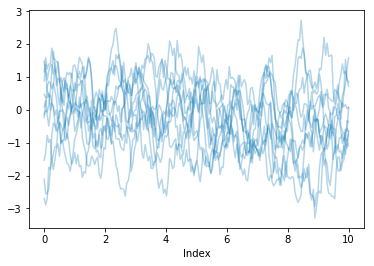

In [14]:
P = Exponential(1) * Uniform(-pi, pi)
t = ContinuousTimeFunction()
S = RV(P, lambda omega: omega[0] * cos(2 * pi * t + omega[1]))
N = GaussianProcess(lambda t: 0, lambda s, t: exp(-abs(t-s)))
S, N = AssumeIndependent(S, N)
X = S + N
X.sim(10).plot()

# Random Walk

### As InfiniteRV, 0 is just an index so `X[0]` is first value, in [-1,1].

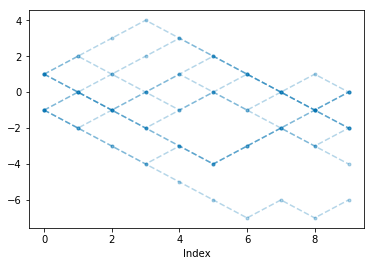

In [2]:
P = BoxModel([-1, 1], size=inf)
Z = RV(P)
X = RV(P, cumsum)
X.sim(10).plot()

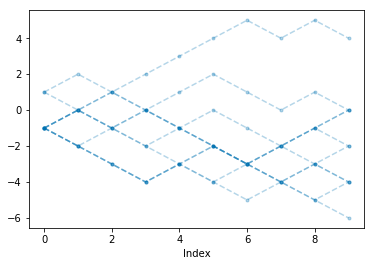

In [5]:
P = BoxModel([-1, 1], size=inf)
Z = 0 & RV(P)
# X = Z.apply(cumsum)
X = RV(P, cumsum)
X.sim(10).plot()

In [7]:
?RandomProcess

### As RandomProcess

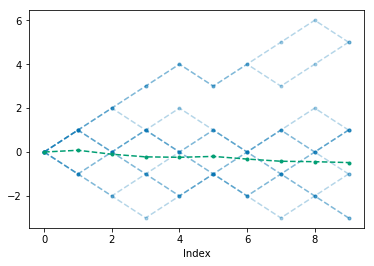

In [6]:
P = BoxModel([-1, 1], size=inf)
Z = RV(P)
X = RandomProcess(P, index_set=Naturals())
X[0] = 0
for n in range(20):
    X[n+1] = X[n] + Z[n]

X.sim(10).plot()
X.sim(100).mean().plot()

# Discrete Time Function

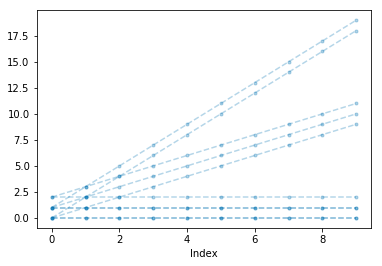

In [18]:
n = DiscreteTimeFunction()
P = BoxModel([0, 1, 2], size=2)
X = A + B * n
X.sim(10).plot()

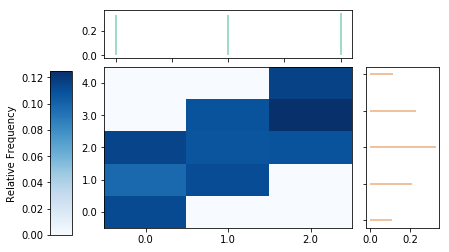

In [19]:
(X[0] & X[1]).sim(1000).plot(['tile', 'marginal'])

In [20]:
X[1].sim(10)

0,0.0
1,1.0
2,4.0
3,2.0
4,2.0
5,3.0
6,1.0
7,1.0
8,0.0
...,...
9,2.0


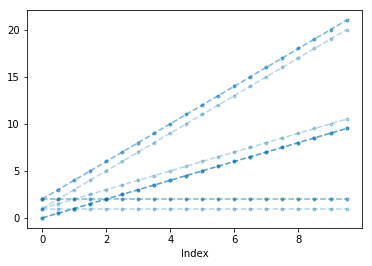

In [21]:
n = DiscreteTimeFunction(fs=2)
P = BoxModel([0, 1, 2], size=2)
X = A + B * n
X.sim(10).plot()

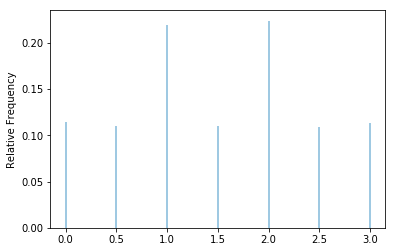

In [22]:
X[1].sim(10000).plot()

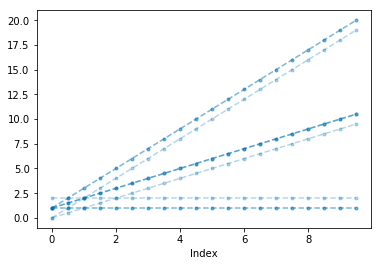

In [23]:
n = DiscreteTimeFunction(fs=2)
P = BoxModel([0, 1, 2], size=2)
X = A + B * n
X.sim(10).plot()

In [24]:
DiscreteTimeFunction(fs=3)

(..., -0.6666666666666666, -0.3333333333333333, 0.0, 0.3333333333333333, 0.6666666666666666, ...)

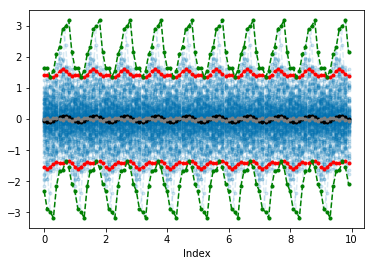

In [25]:
P = Normal() * Uniform(-pi, pi)
t = DiscreteTimeFunction(lambda n: n / 10, fs=10)
X = RV(P, lambda x: x[0] * cos(2 * pi * t + x[1]))
x = X.sim(100)
x.plot()
x.mean().plot(color="black")
x.median().plot(color="gray")
(x.mean() + 2 * x.std()).plot(color="red")
(x.mean() - 2 * x.std()).plot(color="red")
x.min().plot(color="green")
x.max().plot(color="green")

# Random Vector at Random index

In [26]:
P = (Normal(0, 1) ** inf) * Geometric(p=0.1)
X, N = RV(P)
Y = X.apply(cumsum)
Y[30].sim(1000).var()

30.979970739334128

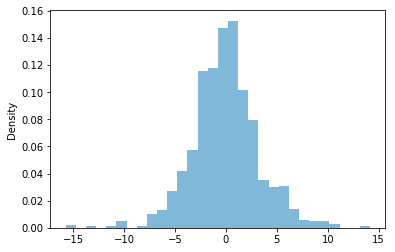

In [27]:
P = (Normal(0, 1) ** inf) * Geometric(p=0.1)
X, N = RV(P)
Y = X.apply(cumsum)
Y[N].sim(1000).plot()

Problem with 0-indexing in the following example, if N=0 want Y = 0, not Y=X[0]

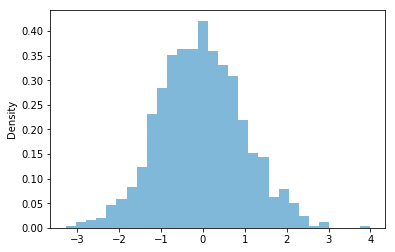

In [28]:
P = (Normal(0, 1) ** inf) * Poisson(0.1)
X, N = RV(P)
Y = X.apply(cumsum)
Y[N].sim(1000).plot()

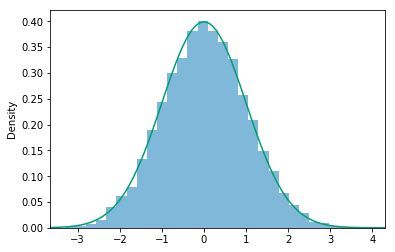

In [29]:
P = (Normal(0, 1) ** inf) * Poisson(0.1)
X, N = RV(P)
Y = X.apply(cumsum)
(Y[N] | (N == 0) ).sim(10000).plot()
Normal(0, 1).plot()

P = (Normal(0, 1) ** inf) * Poisson(0.1)
Z, N = RV(P)
X = concat(0, Z)
Y = X.apply(cumsum)
(Y[N] | (N == 0) ).sim(10000).plot()
Normal(0, 1).plot()

In [40]:
P = Poisson(1) * (Normal() ** inf)
N, _ = RV(P)
Z = RV(P, lambda x: concat(0, x[1].cumsum()))
#Z[N].sim(100).plot()
(Z[N] | (N==0) ).sim(100).plot()

TypeError: Every argument to concat() must be either a scalar, a vector, or an InfiniteTuple.

P = Poisson(1) * (Normal() ** inf)
N, _ = RV(P)
Z = RV(P, lambda x: concat(0, x[1].cumsum()))
Y = Z[N]
Y.sim(1000).plot()

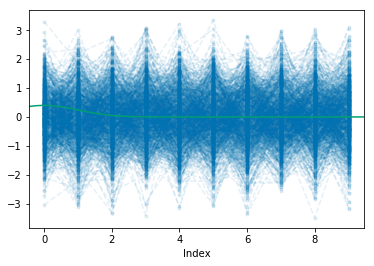

In [41]:
P = BoxModel([0], size=1) * (Normal(0, 1) ** inf)
X = RV(P)
N = RV(Poisson(1))
X, N = AssumeIndependent(X, N)
Y = X.apply(cumsum)
(Y[N] | (N == 1) ).sim(1000).plot()
Normal(0, 1).plot()

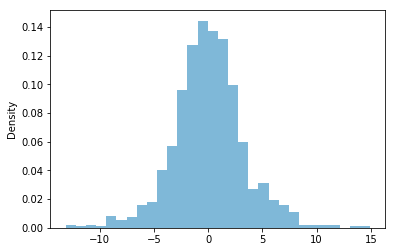

In [33]:
P = (Normal(0, 1) ** inf) * Geometric(p=0.1)
X, N = RV(P)
Y = X.apply(cumsum)
Y[N].sim(1000).plot()


In [34]:
P = Normal()**2 * Normal()**inf
X = RV(P)
isinstance(X.draw(), Vector)

False

In [35]:
P = Normal()**2 * Normal()**inf
X, Y = RV(P)
Z = (X & Y)
isinstance(Z.draw(), Vector)

False

In [36]:
P = BoxModel([1, 2, 3, 4], size=2)
X = RV(P, sum)
Y = RV(P, max)
(X | (~(Y==4)) ).sim(10000).tabulate()

2,1074
3,2176
4,3294
5,2314
6,1142
Total,10000


P = BrownianMotionProbabilitySpace()
t = ContinuousTimeFunction()
X = RV(P, lambda x: x(t))
X.sim(10).plot()

0.522998837884441

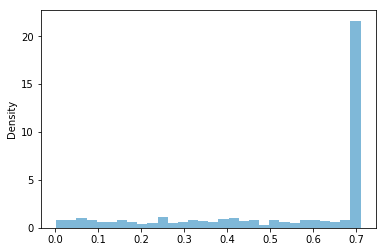

In [37]:
P = Uniform(0, 1) ** 2
U = RV(P)
X = RV(P, sum)
Y = RV(P, max)
u = (U[0] | (abs(Y-0.7) < 0.01) ).sim(1000)
u.plot()
u.mean()

In [38]:
.7*.5 + .35*.5


0.5249999999999999